In [84]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [85]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [86]:
theta_best

array([[4.1781523],
       [2.8583376]])

In [87]:
X_new = np.array([[0,], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.1781523],
       [9.8948275]])

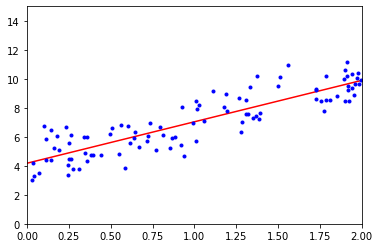

In [88]:
from matplotlib import pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [89]:
#Now we are going to put in the lienar regression model from Scikit-Learn
#Even with integration linear regression we are still getting our array
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.1781523]), array([[2.8583376]]))

In [90]:
lin_reg.predict(X_new)

array([[4.1781523],
       [9.8948275]])

In [91]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) 
theta_best_svd
#Follwing computes the theta to X^y

array([[4.1781523],
       [2.8583376]])

In [92]:
np.linalg.pinv(X_b).dot(y)

array([[4.1781523],
       [2.8583376]])

In [93]:
#Gradient descent is used to update the parameters of the model
def update_weights(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

In [94]:
#The gradient curve can give us our minimum value 
#Mean square equation helps us get our global minima, trying to avoid local minimums at all time
eta = 0.1 # learning rate
n_interations = 1000
m = 100
theta = np.random.randn(2, 1) #random initialization

In [95]:
for interation in range(n_interations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [96]:
theta

array([[4.1781523],
       [2.8583376]])

In [97]:
#Always use matplot lib to plot out your functions import matplot.pyplot as plt
#Problem with batchgradient you are using the whol training set to compute the gradients at every step
#This one uses Stochastic (Random) Gradient Descent using simple learning schedule

n_epochs = 50
t0, t1 = 5, 50 #schuedling the hyperparementers

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [98]:
theta

array([[4.20043208],
       [2.88028582]])

In [99]:
print(X.shape)

(100, 1)


In [100]:
print(y.shape)

(100, 1)


In [101]:
#epochs = time periods in one life
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
y = y.ravel()
sgd_reg.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [102]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15251295]), array([2.8374421]))

In [103]:
#Mini vs stochastic uses less computing power, con behind that may be a less accurate representaiton by holding onto the local minima more and not pertaining more to the global minima
#Different algorithms
#Mini batch GD Batch
#Stochastic GD Batch
#Batch GD
#SVD
#Normal Equation


In [104]:
#You can always fit your nonolinear data with a linear model using POLYNOMIAL REGRESSION
#Ex:
import numpy as np
from matplotlib import pyplot as plt
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [105]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.70844467])

In [106]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09503479]), array([[1.01302448, 0.47736051]]))

In [107]:
#Learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

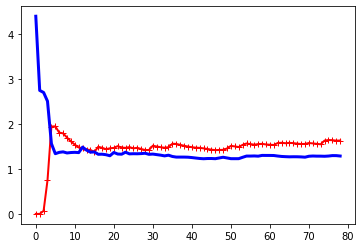

In [108]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [109]:
#Regulariziung linear models
#focusing on ridge regression: A regularized term that takes the sum of all the variables and set it to the global minima
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.58203036]])

In [110]:
#using Stochastic Gradient Descent algorithm for a ridge regression to show the accuracy of our global minimia
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.53354523])

In [111]:
#Lasso regression, completley eliminaties the weights of the least important features, just gets to our global minima to maximize accuracy
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.52004349])

In [112]:
#Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net= ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.52837073])

In [114]:
#Early stoping, indicates where the the model has started to overfit the training data for the neural network

from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()) ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, 
                      penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #continuing where we left off in the schoatstic gradient batch
    y_val_predict = sgd_reg.predicyt(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined